# The following code is modified from:
http://www.nltk.org/howto/sentiment.html


# 1. Prepare data

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def load_reviews(data_file_path, max_seq_len):
    r0_reviews = []
    r1_reviews = []
    r2_reviews = []
    r3_reviews = []

    with open(data_file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            attitude = line.split('\t')[0]
            review = line.split('\t')[1]
            if len(review) > max_seq_len:
                review = review[:max_seq_len]
            if int(attitude) == 0:
                r0_reviews.append(review)
            elif int(attitude) == 1:
                r1_reviews.append(review)
            elif int(attitude) == 2:
                r2_reviews.append(review)
            else:
                r3_reviews.append(review)

    all_reviews = np.array(r0_reviews + r1_reviews + r2_reviews + r3_reviews)
    l0, l1, l2, l3 = len(r0_reviews), len(r1_reviews), len(r2_reviews), len(r3_reviews)
    first_col = np.array([1] * l0 + [0] * l1 + [0] * l2 + [0] * l3).reshape(-1, 1)
    second_col = np.array([0] * l0 + [1] * l1 + [0] * l2 + [0] * l3).reshape(-1, 1)
    third_col = np.array([0] * l0 + [0] * l1 + [1] * l2 + [0] * l3).reshape(-1, 1)
    fourth_col = np.array([0] * l0 + [0] * l1 + [0] * l2 + [1] * l3).reshape(-1, 1)
    labels = np.concatenate([first_col, second_col, third_col, fourth_col], 1)

    print("Numbers of rating 0 reviews: {}".format(len(r0_reviews)))
    print("Numbers of rating 1 reviews: {}".format(len(r1_reviews)))
    print("Numbers of rating 2 reviews: {}".format(len(r2_reviews)))
    print("Numbers of rating 3 reviews: {}".format(len(r3_reviews)))
    
    return all_reviews, labels

In [22]:
MAX_SEQUENCE_LEN = 400
data_file_path = "./labeled_data.txt"

all_reviews, labels = load_reviews(data_file_path, MAX_SEQUENCE_LEN)

Numbers of rating 0 reviews: 3040
Numbers of rating 1 reviews: 987
Numbers of rating 2 reviews: 1451
Numbers of rating 3 reviews: 4522


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    all_reviews, labels, test_size=0.2, random_state=42)

In [26]:
X_test

array(['Played this game loved itWaited 2 years and just got one more locationgot tired of waiting and is now driving a real semi\n',
       'Never puts out any dlcDoubles the games content in a patch... again.Seriously though ReLogic doesnt get nearly enough credit for their work.\n',
       'This game is not very good. I would say that after a significant amount of play time I agree with the complaints that the game was dumbed down too far from even the fairly simple board game that it is based on. Put your mechs in the cover squares and use precision shot to blow the legs or CT off of the enemy mech thats the most dangerous to you right now. Rinse and repeat.Poor performance bugs the',
       ...,
       'Terraria Is really one of the best games Ive played Some people might thinks its a waste of time But if you think about it every game is a waste of time But lets not get into that. Its starts of really slow but after a while its gets quite fun. And the graphics? Oh common dont be s

In [27]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

## Test set 

In [28]:
data = [sentence.strip() for sentence in X_test]
data

['Played this game loved itWaited 2 years and just got one more locationgot tired of waiting and is now driving a real semi',
 'Never puts out any dlcDoubles the games content in a patch... again.Seriously though ReLogic doesnt get nearly enough credit for their work.',
 'This game is not very good. I would say that after a significant amount of play time I agree with the complaints that the game was dumbed down too far from even the fairly simple board game that it is based on. Put your mechs in the cover squares and use precision shot to blow the legs or CT off of the enemy mech thats the most dangerous to you right now. Rinse and repeat.Poor performance bugs the',
 'After about 3 to 4 years of sealing this game. I have once again reopen and discover this shetAfter spending 50 hours. I have nothing to do in my lifeThanks game.Edit: Now with mods and spent 600 hours. HELP',
 'Good game mode but very poor optimization.',
 '1010 my current favorite game Im planning on putting 1000 hours

## labels of the test set

In [64]:
label = np.argmax(y_test, axis=1)
label

array([3, 2, 0, ..., 3, 0, 3], dtype=int64)

## labels predicted by the method (BiLSTM + Attention) for the test set

In [47]:
with open('./text_pred_res.txt', 'r', encoding='utf-8') as f:
    label_pred = f.readlines()
label_pred

['3, 0, 0, 2, 2, 3, 0, 2, 3, 0, 0, 3, 2, 3, 0, 3, 0, 2, 3, 3, 3, 2, 3, 3, 2, 3, 0, 2, 3, 3, 0, 0, 2, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 2, 3, 0, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 3, 0, 2, 3, 0, 2, 0, 1, 0, 0, 3, 0, 3, 3, 0, 3, 0, 2, 2, 3, 2, 2, 0, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 0, 2, 2, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 2, 3, 2, 3, 3, 2, 0, 3, 0, 3, 2, 3, 2, 0, 3, 3, 1, 0, 3, 0, 3, 0, 2, 3, 0, 3, 3, 2, 0, 2, 3, 3, 3, 1, 3, 0, 3, 2, 2, 3, 2, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 0, 3, 2, 1, 3, 0, 3, 0, 0, 3, 1, 2, 0, 2, 1, 0, 0, 0, 3, 2, 3, 0, 3, 3, 0, 3, 0, 3, 0, 1, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 2, 1, 0, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 0, 2, 0, 0, 2, 3, 0, 0, 3, 2, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 0, 0, 3, 3, 2, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 2, 3, 0, 3, 3, 3, 3, 0, 0, 2, 2, 3, 3, 3, 0, 3, 2, 3, 3, 0, 3, 3, 0, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 0,

In [48]:
label_pred = str(label_pred[0]).split(',')
label_pred = [member.strip() for member in label_pred]
label_pred = [float(i) for i in label_pred]
label_pred

[3.0,
 0.0,
 0.0,
 2.0,
 2.0,
 3.0,
 0.0,
 2.0,
 3.0,
 0.0,
 0.0,
 3.0,
 2.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 0.0,
 2.0,
 0.0,
 3.0,
 3.0,
 3.0,
 0.0,
 1.0,
 3.0,
 3.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 3.0,
 2.0,
 3.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 0.0,
 3.0,
 0.0,
 2.0,
 3.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 0.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.0,
 3.0,
 1.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.0,
 2.0,
 2.0,
 3.0,
 3.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 3.0,
 3.0,
 3.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 0.0,
 3.0,
 0.0,
 3.0,
 2.0,
 3.0,
 2.0,
 0.0,
 3.0,
 3.0,
 1.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 3.0,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 2.0,
 3.0,
 3.0,
 3.0,
 1.0,
 3.0,
 0.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 3.0

## Labels predicted by Sentiment Intensity Analyzer from NLTK

In [50]:
sid = SentimentIntensityAnalyzer()

In [96]:
label_base = []
for sentence in data:
    res = sid.polarity_scores(sentence)
    pos = res['pos'] + 0.5*res['neu']
   
    if pos>0.6:
        label_base.append(3)
    elif pos>0.5:
        label_base.append(2)
    elif pos>0.4:
        label_base.append(1)
    else:
        label_base.append(0)
label_base

[2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 0,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 0,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 0,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 2,
 0,
 2,
 1,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 0,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 1,


## An example

In [58]:
sid.polarity_scores('This is extremely good, fantastic. This is the best')

{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'compound': 0.9056}

# 2. Comparison

## Baseline evaluation

In [61]:
from sklearn.metrics import accuracy_score, f1_score

In [120]:
print('accuracy: ',accuracy_score(label, label_base))

accuracy:  0.348


In [121]:
f1_separate_base = f1_score(label, label_base, average=None)

In [122]:
print('f1 score for all categories 0,1,2 and 3: ',f1_separate_base)

f1 score for all categories 0,1,2 and 3:  [0.18553888 0.15591398 0.22796935 0.60987153]


In [123]:
f1_micro_base = f1_score(label, label_base, average='micro')

In [124]:
print('f1 score: ',f1_micro_base)

f1 score:  0.348


## Method evaluation

In [125]:
print('accuracy: ',accuracy_score(label, label_pred))

accuracy:  0.8


In [126]:
f1_separate_method = f1_score(label, label_pred, average=None)

In [127]:
print('f1 score for all categories 0,1,2 and 3: ',f1_separate_method)

f1 score for all categories 0,1,2 and 3:  [0.87459807 0.34965035 0.56       0.89625668]


In [128]:
f1_micro_method = f1_score(label, label_pred, average='micro')

In [129]:
print('f1 score: ',f1_micro_method)

f1 score:  0.8000000000000002


## Comparison

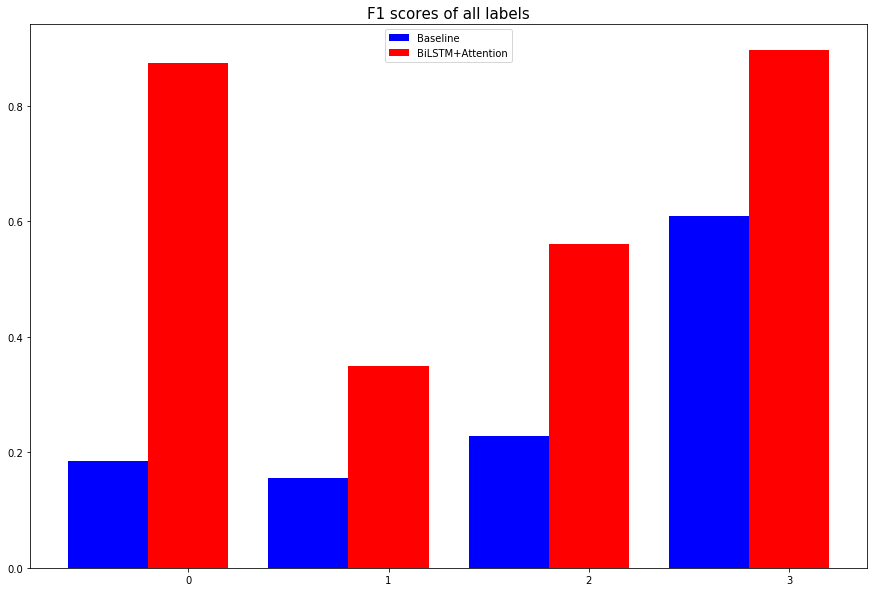

In [145]:
plt.figure(figsize=(15,10))
plt.title("F1 scores of all labels",fontsize=15)
names = ['0','1','2','3']
x =list(range(len(names)))
width = 0.4
plt.bar(x, f1_separate_base, width=width, label='Baseline',fc = 'b')

for i in range(len(x)):
    x[i] = x[i] + width
    
plt.bar(x, f1_separate_method, width=width, label='BiLSTM+Attention',tick_label = names,fc = 'r')
plt.legend(loc = 'upper center')
plt.show()